In [53]:
import glob
import zipfile
# Import libraries
import pandas as pd
import seaborn as sb
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

from yellowbrick.cluster import KElbowVisualizer

In [52]:
!pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.8 MB/s eta 0:00:0000:01


In [5]:
zf = zipfile.ZipFile("data.zip")


In [6]:
dfs = [pd.read_csv(zf.open(f), sep=",") for f in zf.namelist()]

In [60]:
historical=dfs[0]
new=dfs[2]
merchant=dfs[1]
score_df=dfs[3]

In [9]:
historical

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,NaN,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,NaN,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9


In [10]:
new

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [8]:
#removing negatives from month lag
historical["month_lag"]=abs(historical["month_lag"])
new_and_his=pd.concat([historical, new],ignore_index = True)
new_and_his

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075387,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
31075388,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
31075389,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
31075390,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [12]:
merchant

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,...,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN


In [9]:
new_his_mer=pd.merge(new_and_his, merchant,on=["merchant_id", "state_id" , "city_id", "subsector_id","merchant_category_id", "category_1", "category_2"],how="inner")
new_his_mer

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,Y,C_ID_cf615e2bb8,296,N,0,A,68,M_ID_16a7d71c54,2,-0.686802,...,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12,N
20289040,Y,C_ID_2747b3a8ec,212,N,-1,NaN,34,M_ID_d1f0c32fe8,1,-0.228493,...,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12,Y
20289041,Y,C_ID_729db768e1,261,N,0,A,273,M_ID_7ebe45f784,2,-0.731881,...,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12,N
20289042,Y,C_ID_09f3c45b34,296,N,0,A,278,M_ID_ca64cb9e56,2,-0.671925,...,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12,N


In [14]:
score

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749
...,...,...,...,...,...,...
201912,C_ID_963962de2c,Sep-17,3,2,1,-2.740821
201913,C_ID_1314773c0b,Oct-15,3,1,1,0.312917
201914,C_ID_7666735b3d,Aug-17,4,3,0,0.093494
201915,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.676589


In [10]:
#merge features of score csv with excluding the target
df = pd.merge(new_his_mer, score, on="card_id" , how="inner")
df

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,4,-0.713098,...,6,1.19,1.156844,12,Y,Aug-17,3,2,1,-0.168948
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.699694,...,6,1.13,1.125829,12,Y,Aug-17,3,2,1,-0.168948
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,5,-0.684488,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.665855,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,5,-0.695893,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563647,Y,C_ID_191dcf4f8b,116,N,0,A,419,M_ID_ebfea682eb,2,-0.716855,...,6,0.57,0.655303,12,N,Dec-17,3,1,1,-0.742585
12563648,Y,C_ID_e814936231,293,N,0,A,307,M_ID_a396a4f84e,2,-0.596643,...,6,0.29,0.437255,6,N,Oct-16,3,1,1,0.826023
12563649,Y,C_ID_9be25c5f29,157,N,1,B,45,M_ID_f2c6ed1e33,2,-0.656749,...,6,1.42,1.777778,12,N,Dec-17,5,1,1,0.268295
12563650,Y,C_ID_295d3d1968,246,N,0,A,511,M_ID_60cddec486,2,0.004418,...,6,0.96,1.023810,12,Y,Nov-17,3,2,1,-1.054437


In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

#### since categorical and test values won't benefit us regarding K-means clustering i will remove all object type columns

In [11]:
#Dropping the id columns except card id
df["purchase_date"]= pd.to_datetime(df["purchase_date"])
df['card_id']=df['card_id'].astype("category")
df.drop(columns=["merchant_category_id","merchant_id","subsector_id","merchant_group_id","state_id","city_id","category_2"],inplace=True)
# selecting only numerical features
df = df.select_dtypes(exclude=['object'])
df

,card_id,installments,month_lag,purchase_amount,purchase_date,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3,score
0,C_ID_d244d8976d,0,4,-0.713098,2017-10-27 20:41:25,23.470597,23.014512,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,3,2,1,-0.168948
1,C_ID_d244d8976d,0,0,-0.699694,2018-02-02 12:39:34,117.830742,116.888826,1.08,1.092926,3,1.09,1.095924,6,1.13,1.125829,12,3,2,1,-0.168948
2,C_ID_d244d8976d,0,5,-0.684488,2017-09-13 23:15:53,3.174788,-0.047556,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,3,2,1,-0.168948
3,C_ID_d244d8976d,0,0,-0.665855,2018-02-23 19:20:07,3.174788,-0.047556,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,3,2,1,-0.168948
4,C_ID_d244d8976d,0,5,-0.695893,2017-09-20 23:43:11,3.174788,-0.047556,1.00,1.022618,3,0.99,1.019505,6,1.00,1.024796,12,3,2,1,-0.168948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563647,C_ID_191dcf4f8b,0,2,-0.716855,2018-04-12 18:10:47,-0.057471,-0.057471,1.04,1.106061,3,0.84,0.893939,6,0.57,0.655303,12,3,1,1,-0.742585
12563648,C_ID_e814936231,0,2,-0.596643,2018-02-20 13:03:17,-0.057471,-0.057471,0.48,0.662745,3,0.29,0.437255,6,0.29,0.437255,6,3,1,1,0.826023
12563649,C_ID_9be25c5f29,1,2,-0.656749,2018-04-30 18:25:22,-0.057471,-0.057471,2.06,2.222222,3,2.05,2.277778,6,1.42,1.777778,12,5,1,1,0.268295
12563650,C_ID_295d3d1968,0,2,0.004418,2018-04-05 14:28:34,-0.057471,-0.057471,0.82,0.857143,3,0.65,0.809524,6,0.96,1.023810,12,3,2,1,-1.054437


In [11]:
# correlation analysis
corr = df.corr()
corr.style.background_gradient(cmap='gist_heat')

,installments,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3
installments,1.000000,-0.003327,-0.000048,-0.017494,-0.017478,-0.000230,0.001210,-0.001329,-0.000183,0.004766,-0.001658,-0.000129,0.008120,-0.004009,-0.009599,-0.070862,-0.089307
month_lag,-0.003327,1.000000,-0.000075,0.009100,0.009037,0.011536,0.011594,-0.005756,0.011408,0.011678,-0.011249,0.010677,0.011698,0.030282,0.048779,0.051109,0.052590
purchase_amount,-0.000048,-0.000075,1.000000,-0.000063,-0.000062,-0.000004,-0.000004,-0.000001,-0.000004,-0.000004,0.000006,-0.000004,-0.000003,0.000024,-0.000006,-0.000283,0.000252
numerical_1,-0.017494,0.009100,-0.000063,1.000000,0.999475,-0.002018,-0.002207,0.003195,-0.002021,-0.002731,0.006822,-0.001899,-0.003204,0.027266,-0.014979,-0.022605,-0.000161
numerical_2,-0.017478,0.009037,-0.000062,0.999475,1.000000,-0.001981,-0.002165,0.003137,-0.001984,-0.002680,0.006698,-0.001864,-0.003145,0.026771,-0.014565,-0.022136,0.000363
avg_sales_lag3,-0.000230,0.011536,-0.000004,-0.002018,-0.001981,1.000000,0.996134,0.000137,0.960782,0.996018,0.000116,0.868885,0.995759,-0.051190,0.000570,0.001688,0.000408
avg_purchases_lag3,0.001210,0.011594,-0.000004,-0.002207,-0.002165,0.996134,1.000000,0.000135,0.942339,0.994796,0.000097,0.842173,0.980140,-0.051393,0.000573,0.001638,0.000132
active_months_lag3,-0.001329,-0.005756,-0.000001,0.003195,0.003137,0.000137,0.000135,1.000000,0.000137,0.000170,0.718931,0.000129,0.000202,0.296432,0.002942,0.001031,0.003873
avg_sales_lag6,-0.000183,0.011408,-0.000004,-0.002021,-0.001984,0.960782,0.942339,0.000137,1.000000,0.942283,0.000108,0.971530,0.942079,-0.048504,0.000561,0.001429,0.000303
avg_purchases_lag6,0.004766,0.011678,-0.000004,-0.002731,-0.002680,0.996018,0.994796,0.000170,0.942283,1.000000,0.000148,0.842160,0.995217,-0.051107,0.000515,0.001446,-0.000611


In [12]:
#drop columns with high correlation
df.drop(columns=["numerical_2","avg_sales_lag3","avg_purchases_lag3","active_months_lag3","avg_sales_lag6","avg_purchases_lag6","active_months_lag6","avg_sales_lag12"],inplace=True)

In [14]:
# checking correlation after drop
corr = df.corr()
corr.style.background_gradient(cmap='gist_heat')

,installments,month_lag,purchase_amount,numerical_1,avg_purchases_lag12,active_months_lag12,feature_1,feature_2,feature_3
installments,1.000000,-0.003327,-0.000048,-0.017494,0.008120,-0.004009,-0.009599,-0.070862,-0.089307
month_lag,-0.003327,1.000000,-0.000075,0.009100,0.011698,0.030282,0.048779,0.051109,0.052590
purchase_amount,-0.000048,-0.000075,1.000000,-0.000063,-0.000003,0.000024,-0.000006,-0.000283,0.000252
numerical_1,-0.017494,0.009100,-0.000063,1.000000,-0.003204,0.027266,-0.014979,-0.022605,-0.000161
avg_purchases_lag12,0.008120,0.011698,-0.000003,-0.003204,1.000000,-0.050049,0.000460,0.001267,-0.001298
active_months_lag12,-0.004009,0.030282,0.000024,0.027266,-0.050049,1.000000,0.003550,0.000168,0.004534
feature_1,-0.009599,0.048779,-0.000006,-0.014979,0.000460,0.003550,1.000000,-0.109271,0.582312
feature_2,-0.070862,0.051109,-0.000283,-0.022605,0.001267,0.000168,-0.109271,1.000000,0.057856
feature_3,-0.089307,0.052590,0.000252,-0.000161,-0.001298,0.004534,0.582312,0.057856,1.000000


In [199]:
df.isnull().sum()

card_id                0
installments           0
month_lag              0
purchase_amount        0
purchase_date          0
numerical_1            0
avg_purchases_lag12    0
active_months_lag12    0
feature_1              0
feature_2              0
feature_3              0
score                  0
dtype: int64

there are no missing values in our data 

#### Creating RFM features out of purchases

In [28]:

product_counts = df.groupby('card_id')['purchase_amount'].size().reset_index()
product_counts = product_counts.rename(columns={'purchase_amount': 'frequency'})

# frequency


#monetary
product_price = df.groupby('card_id')['purchase_amount'].mean().reset_index()
product_price = product_price.rename(columns={'purchase_amount': 'monetary'})
#create new dataframe and add the new features
features=pd.merge(product_counts,product_price,on=["card_id"])

# calculate recency in days
most_recent_purchase = df.groupby('card_id')['purchase_date'].max()
most_recent_purchase= (most_recent_purchase.max()-most_recent_purchase).dt.days.reset_index()
most_recent_purchase = most_recent_purchase.rename(columns={'purchase_date': 'recency'})

features=pd.merge(features,most_recent_purchase,on=["card_id"])

score_group = df.groupby('card_id')['score'].max().reset_index()
features=pd.merge(features,score_group,on=["card_id"])
# print the resulting dataframe
print(features)


                card_id  frequency  monetary  recency     score
0       C_ID_00007093c1         45 -0.638961       27  0.134077
1       C_ID_0001506ef0         55 -0.492424       39  0.884295
2       C_ID_000183fdda        126 -0.510138        0 -0.264433
3       C_ID_00027503e2         38 -0.741493      101  0.812872
4       C_ID_0002c7c2c1         57 -0.661876       37  1.288514
...                 ...        ...       ...      ...       ...
193614  C_ID_fffeced303        173 -0.688965        3  0.362965
193615  C_ID_fffeed3a89        159 -0.496780        0 -0.085357
193616  C_ID_ffff579d3a         82 -0.702992       40  1.530061
193617  C_ID_ffff828181         29 -0.585047        1 -0.600063
193618  C_ID_fffffd5772         32 -0.725307       63 -1.073077

[193619 rows x 5 columns]


#### Creating new features of of installemnts and month lags

In [29]:
#get average month lag
avg_lag = round(df.groupby('card_id')['month_lag'].mean()).reset_index()
avg_lag = avg_lag.rename(columns={'month_lag': 'avg_lag'})
features=pd.merge(features,avg_lag,on=["card_id"])
avg_lag
#average installments
avg_ins = round(df.groupby('card_id')['installments'].mean()).reset_index()
avg_ins = avg_ins.rename(columns={'installments': 'avg_installments'})
features=pd.merge(features,avg_ins,on=["card_id"])

features

,card_id,avg_lag
0,C_ID_00007093c1,4.0
1,C_ID_0001506ef0,4.0
2,C_ID_000183fdda,2.0
3,C_ID_00027503e2,4.0
4,C_ID_0002c7c2c1,3.0
...,...,...
193614,C_ID_fffeced303,5.0
193615,C_ID_fffeed3a89,1.0
193616,C_ID_ffff579d3a,4.0
193617,C_ID_ffff828181,5.0


,card_id,frequency,monetary,recency,score,avg_lag,avg_installments
0,C_ID_00007093c1,45,-0.638961,27,0.134077,4.0,1.0
1,C_ID_0001506ef0,55,-0.492424,39,0.884295,4.0,0.0
2,C_ID_000183fdda,126,-0.510138,0,-0.264433,2.0,2.0
3,C_ID_00027503e2,38,-0.741493,101,0.812872,4.0,0.0
4,C_ID_0002c7c2c1,57,-0.661876,37,1.288514,3.0,0.0
...,...,...,...,...,...,...,...
193614,C_ID_fffeced303,173,-0.688965,3,0.362965,5.0,1.0
193615,C_ID_fffeed3a89,159,-0.496780,0,-0.085357,1.0,1.0
193616,C_ID_ffff579d3a,82,-0.702992,40,1.530061,4.0,0.0
193617,C_ID_ffff828181,29,-0.585047,1,-0.600063,5.0,2.0


In [209]:
features.isnull().sum()

card_id             0
frequency           0
monetary            0
recency             0
score               0
avg_lag             0
avg_installments    0
dtype: int64

In [30]:
score=pd.DataFrame(features["score"])
features.drop(columns=["card_id","score"],inplace=True)

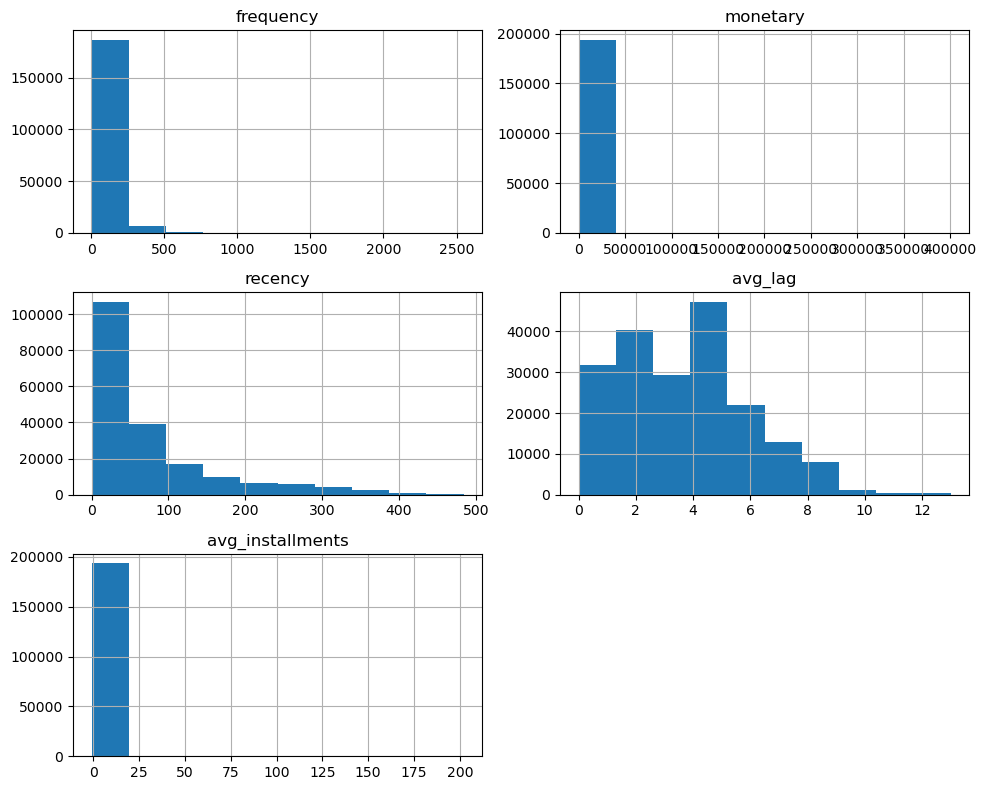

In [144]:
# Visualize distribution of each feature
features.hist(figsize=(10,8))
plt.tight_layout();

In [16]:
# feature normalization, you can also try what if not performing this step.
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(features)

feat_scaled = pd.DataFrame(feat_scaled)
feat_scaled.describe()

,0,1,2,3,4
count,1.936190e+05,1.936190e+05,1.936190e+05,1.936190e+05,1.936190e+05
mean,8.396499e-17,-5.045973e-19,3.156027e-17,4.616607e-17,-2.286285e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-7.626533e-01,-2.974756e-03,-8.192810e-01,-1.681307e+00,-1.379908e+00
25%,-5.955318e-01,-2.904471e-03,-7.052444e-01,-7.756513e-01,-6.344548e-01
50%,-3.329123e-01,-2.840906e-03,-3.859419e-01,-3.228234e-01,1.109985e-01
75%,1.923267e-01,-2.705949e-03,2.526631e-01,5.828324e-01,1.109985e-01
max,2.964152e+01,4.396856e+02,4.700091e+00,4.205456e+00,1.499471e+02


# Q1:
#### 1. i used RFM features monetary,frequency and recency and i add two new features which i think might benefit our analysis which are installments and average lag
#### 2. i used K-elblow method 
#### Observations:
1. the quality of cluster is relativly good except for cluster 2 which i think represents a unique customer with vey high monetary value
2. cluster 0 has lowest average recency
3. cluster 1 has highest frequency
4. cluster 2 has highest monetary
5. cluster 3 has highest recency and average installments
6. both cluster 1 and 3 have the same average month lag



/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(2, 12))

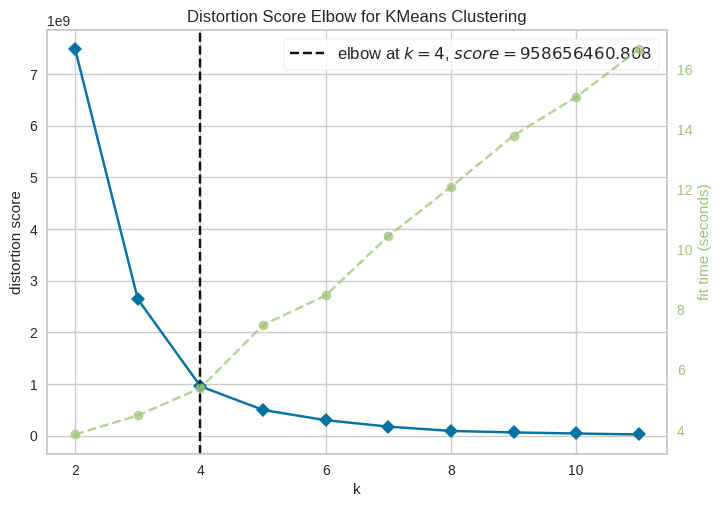

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(feat_scaled)   
visualizer.show()

looks like our best k value based on the elbow method is 4 

In [37]:
#refitting with the best ka value
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(feat_scaled)

# Predict the cluster of each row
labels = kmeans.predict(feat_scaled)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [218]:
print(score)

0                                                   0.134077
1                                                   0.884295
2                                                  -0.264433
3                                                   0.812872
4                                                   1.288514
                                 ...                        
193615                                             -0.085357
193616                                              1.530061
193617                                             -0.600063
193618                                             -1.073077
cluster    [0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 1, 0, 0, 0, ...
Name: score, Length: 193620, dtype: object


In [40]:
# Calculate Silhoutte Score
#
#score_sohi = silhouette_score(feat_scaled, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_sohi)

Silhouetter Score: 0.300


# Q2: 
#### After Calculating the statistices of each group of user scores in each cluster:
1. highest score belongs to the belongs to cluster 2 which i persume refers to a unique user with high monetary and low lag, insatllments, recency

2. lowest score was for cluster 3 which has highest recency

In [230]:

score["cluster"] = labels

# Calculate statistics for each cluster
cluster_stats = score.groupby("cluster")["score"].agg([pd.Series.mean, pd.Series.median, pd.Series.std])

print(cluster_stats)


             mean    median       std
cluster                              
0       -0.275965 -0.032099  3.112193
1       -0.323315 -0.008895  3.604163
2        0.072539  0.072539       NaN
3       -1.006552 -0.074304  6.013760


In [190]:
# Create a new DataFrame with the cluster labels
clusters = pd.DataFrame({'Cluster': labels})

# ad our new labels to our features dataframe
results = pd.concat([features, clusters], axis=1)

In [184]:
results

,frequency,monetary,recency,avg_lag,avg_installments,Cluster
0,45,-0.638961,27,4.0,1.0,0
1,55,-0.492424,39,4.0,0.0,0
2,126,-0.510138,0,2.0,2.0,0
3,38,-0.741493,101,4.0,0.0,0
4,57,-0.661876,37,3.0,0.0,0
...,...,...,...,...,...,...
193614,173,-0.688965,3,5.0,1.0,0
193615,159,-0.496780,0,1.0,1.0,0
193616,82,-0.702992,40,4.0,0.0,0
193617,29,-0.585047,1,5.0,2.0,0


#### Visualizing Clusters for each feature

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'avg_installments')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'avg_installments')

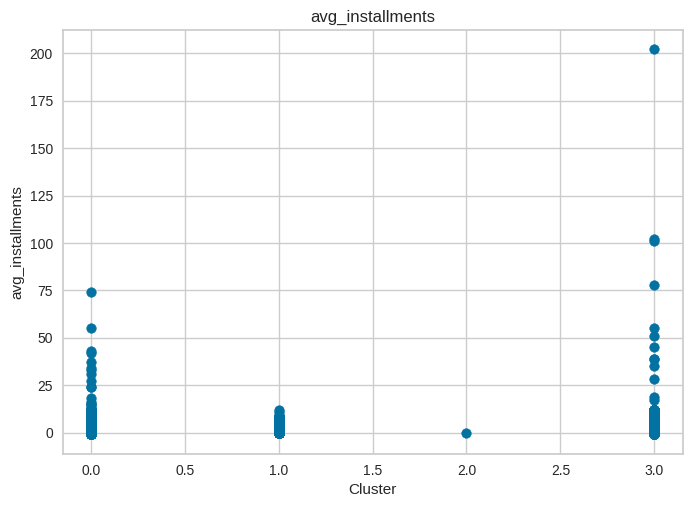

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'avg_lag')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'avg_lag')

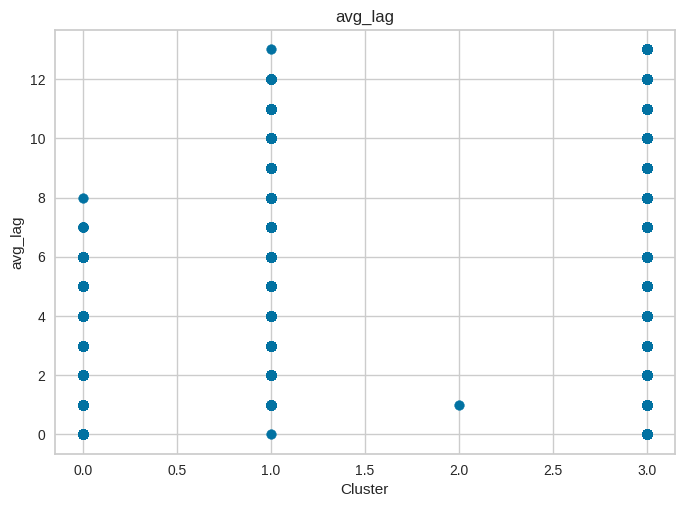

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'recency')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'recency')

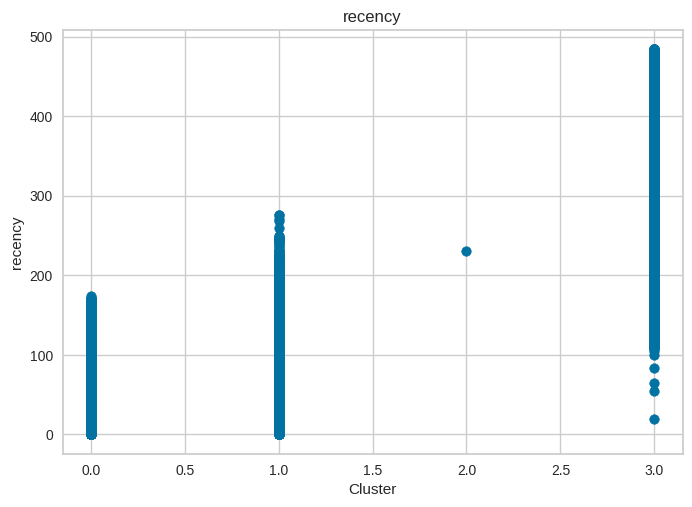

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'monetary')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'monetary')

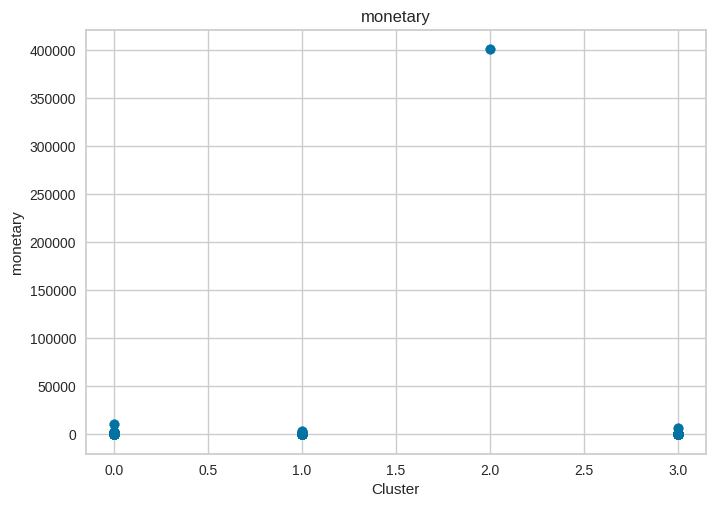

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'frequency')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'frequency')

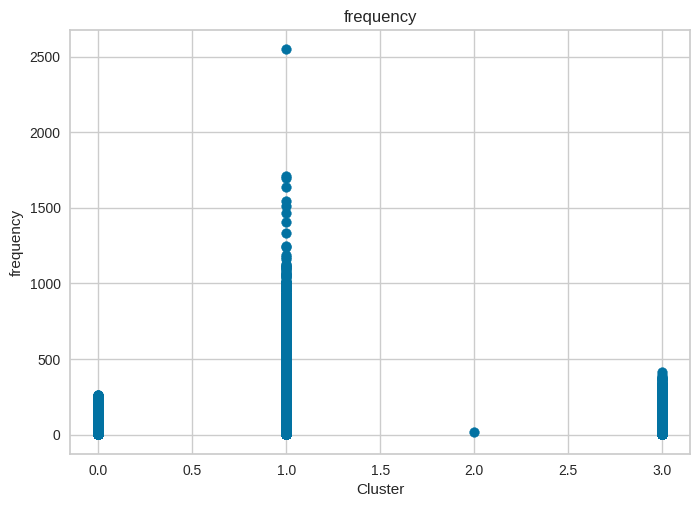

In [235]:
clusters_vis = results[['Cluster', 'avg_installments', 'avg_lag', 'recency','monetary','frequency']]

# Create a separate scatter for each column, grouped by the "Cluster" column
for col in clusters_vis.columns[1:]:
    plt.figure()
    plt.scatter(x='Cluster', y=col, data=clusters_vis)
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

In [231]:
#get centroids of each cluster
centroids = kmeans.cluster_centers_

# Print the centroids of each cluster
print(centroids)

[[-3.22376996e-01 -2.23688141e-03 -3.46003825e-01 -6.05178900e-01
   7.13679384e-02]
 [ 6.88349537e-01 -2.34503336e-03 -3.73319720e-01  9.77031038e-01
  -1.68315042e-01]
 [-5.95531798e-01  4.39685643e+02  1.81496476e+00 -1.22847922e+00
  -6.34454823e-01]
 [-4.00003434e-01 -2.22537920e-03  1.99326199e+00 -6.43331625e-02
   1.23276858e-01]]


# Q3:
#### the clusters suffer from high dimensionality so i tried PCA after i measured siholette score before and after using PCA it turns out that without PCA we had a score of 0.300 and with PCA we had a score of 0.258 but the unique value cluster got removed ,however i don't think that PCA achieved significant improvement

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(2, 12))

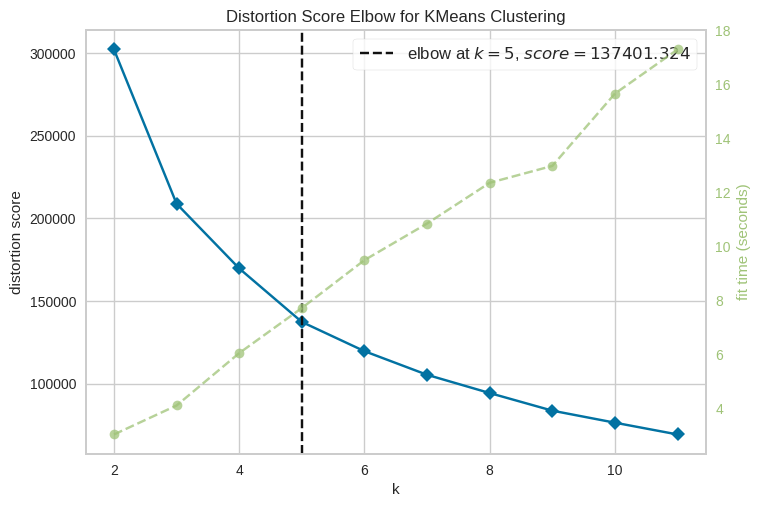

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
#Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(feat_scaled)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X_pca)   
visualizer.show()

In [25]:
#refitting with the best ka value
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster of each row
labels = kmeans.predict(X_pca)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [31]:
score["cluster"] = labels

# Calculate statistics for each cluster
cluster_stats = score.groupby("cluster")["score"].agg([pd.Series.mean, pd.Series.median, pd.Series.std])

print(cluster_stats)


             mean    median       std
cluster                              
0       -0.242415 -0.058654  2.665635
1       -0.492456  0.141795  5.483386
2       -0.387793  0.000000  4.004880
3       -0.798706 -0.041619  5.387787
4       -0.244708 -0.074485  2.376088


# Q4 fingings:
#### the cluster that represent a unique value is removed but i don't think the clusters quality have improved that much

In [32]:
# Create a new DataFrame with the cluster labels
clusters = pd.DataFrame({'Cluster': labels})

# ad our new labels to our features dataframe
results = pd.concat([features, clusters], axis=1)

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'avg_installments')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'avg_installments')

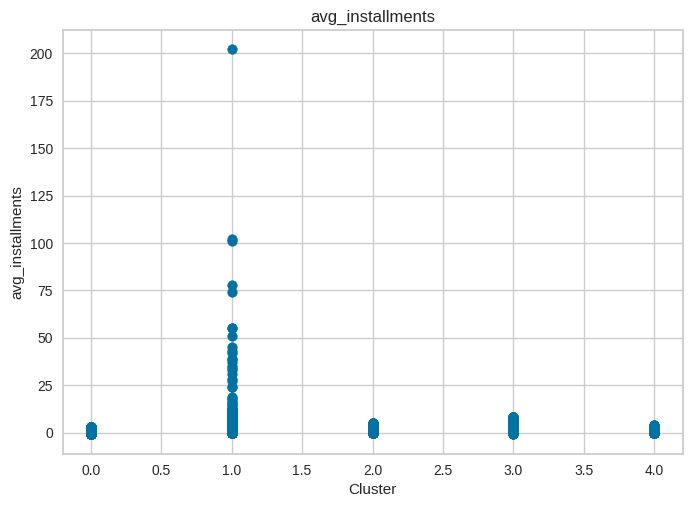

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'avg_lag')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'avg_lag')

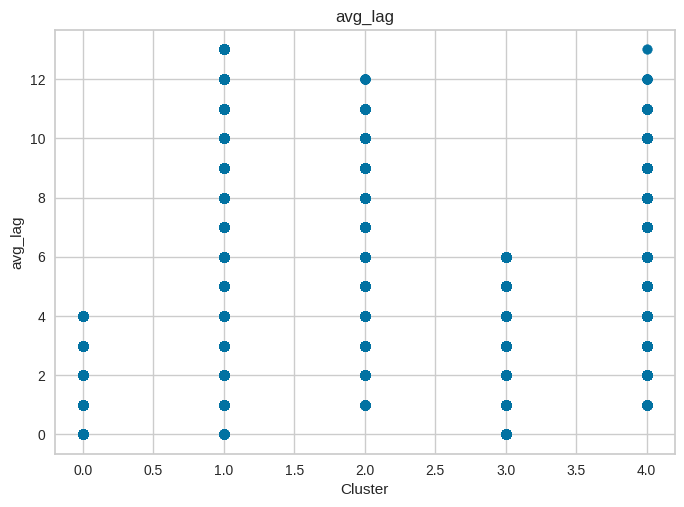

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'recency')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'recency')

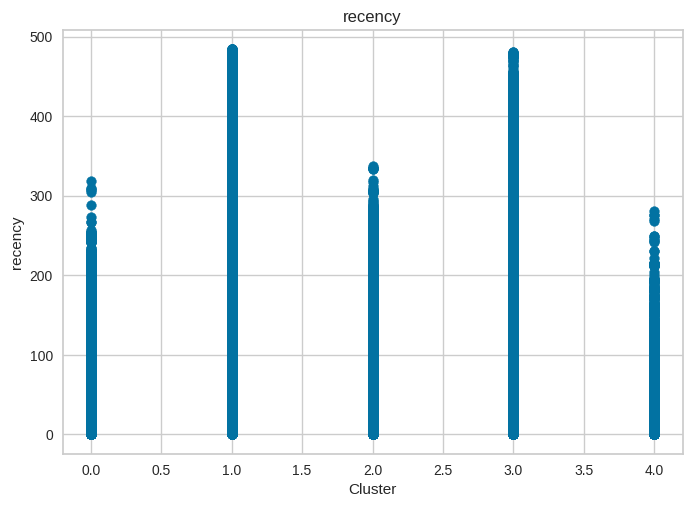

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'monetary')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'monetary')

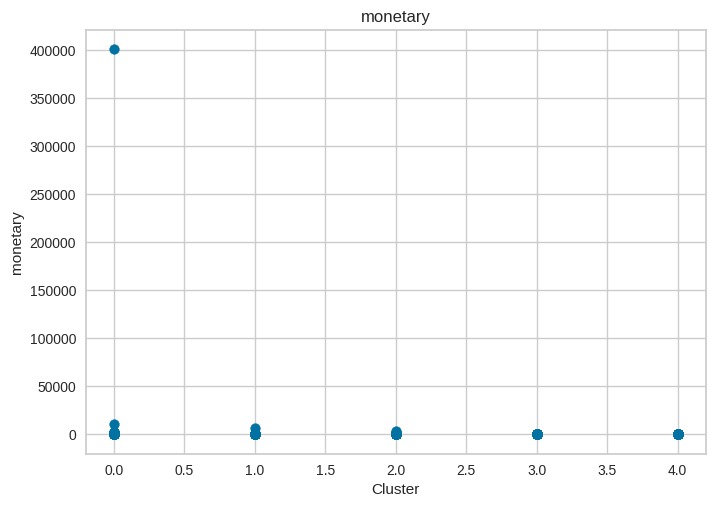

<Figure size 800x550 with 0 Axes>

Text(0.5, 1.0, 'frequency')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'frequency')

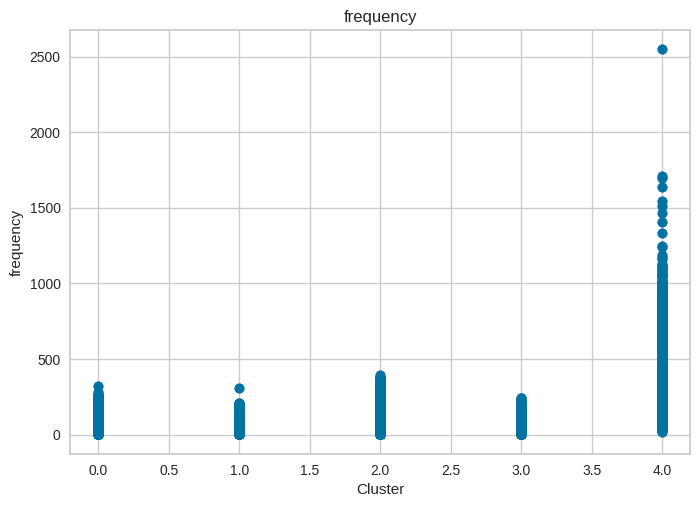

In [33]:
clusters_vis = results[['Cluster', 'avg_installments', 'avg_lag', 'recency','monetary','frequency']]

# Create a separate scatter for each column, grouped by the "Cluster" column
for col in clusters_vis.columns[1:]:
    plt.figure()
    plt.scatter(x='Cluster', y=col, data=clusters_vis)
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

In [36]:
# Calculate Silhoutte Score
#
score_sohi = silhouette_score(feat_scaled, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score_sohi)

Silhouetter Score: 0.258


## frequent Pattern mining

In [48]:
data=pd.merge(new_and_his, merchant,on=["merchant_id", "state_id" , "city_id", "subsector_id","merchant_category_id", "category_1", "category_2"],how="inner")
data

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289039,Y,C_ID_cf615e2bb8,296,N,0,A,68,M_ID_16a7d71c54,2,-0.686802,...,1.20,1.055556,3,2.20,1.527778,6,2.10,1.638889,12,N
20289040,Y,C_ID_2747b3a8ec,212,N,-1,NaN,34,M_ID_d1f0c32fe8,1,-0.228493,...,1.69,1.333333,3,2.67,2.333333,6,3.03,2.555556,12,Y
20289041,Y,C_ID_729db768e1,261,N,0,A,273,M_ID_7ebe45f784,2,-0.731881,...,0.49,0.727273,3,0.52,0.606061,6,0.48,0.621212,12,N
20289042,Y,C_ID_09f3c45b34,296,N,0,A,278,M_ID_ca64cb9e56,2,-0.671925,...,1.07,0.904762,3,1.23,1.007937,6,1.30,1.075397,12,N


In [50]:
# Select columns
data = data[['card_id', 'merchant_id', 'merchant_group_id', 'merchant_category_id', 'subsector_id', 'city_id', 'state_id']]

# Convert to type object
data = data.astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20289044 entries, 0 to 20289043
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   card_id               object
 1   merchant_id           object
 2   merchant_group_id     object
 3   merchant_category_id  object
 4   subsector_id          object
 5   city_id               object
 6   state_id              object
dtypes: object(7)
memory usage: 1.1+ GB


In [55]:
card_id=data.groupby('card_id')['merchant_category_id'].agg('unique')
card_id

card_id
C_ID_00007093c1         [755, 705, 45, 683, 818, 307, 422, 437, 222]
C_ID_0001238066    [278, 606, 68, 839, 550, 454, 690, 80, 367, 30...
C_ID_0001506ef0    [705, 367, 422, 68, 437, 560, 557, 178, 222, 7...
C_ID_0001793786    [278, 367, 703, 661, 842, 80, 818, 884, 111, 8...
C_ID_000183fdda    [884, 690, 367, 210, 307, 705, 842, 357, 68, 8...
                                         ...                        
C_ID_ffff1d9928                   [755, 307, 63, 705, 690, 884, 367]
C_ID_ffff579d3a    [278, 87, 705, 606, 419, 369, 690, 80, 560, 36...
C_ID_ffff756266         [307, 80, 363, 422, 840, 529, 278, 367, 411]
C_ID_ffff828181    [367, 661, 278, 111, 834, 511, 40, 607, 884, 7...
C_ID_fffffd5772                                      [661, 755, 307]
Name: merchant_category_id, Length: 312033, dtype: object

In [56]:
mer_state = data[['merchant_category_id', 'state_id']].astype(str).values.tolist()

encoder = TransactionEncoder()
encoded_card = encoder.fit_transform(card_id.values)
df = pd.DataFrame(encoded_card, columns=encoder.columns_)
df

,-1,2,9,11,14,16,18,19,21,31,...,854,873,875,878,879,881,884,885,889,891
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
312029,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
312030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
312031,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Q5:
#### after many trials i have determined that the best minimum support is 0.5 since it gave me top 10 frrequent patterns
#### the top most frequent merchant category are         (705, 367) with score of 0.616393

In [70]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
# Print the frequent itemsets for
frequent_itemsets

,support,itemsets
0,0.623985,(80)
1,0.610226,(278)
2,0.633705,(307)
3,0.665024,(367)
4,0.787016,(705)
5,0.502211,"(80, 278)"
6,0.505371,"(80, 367)"
7,0.570819,"(80, 705)"
8,0.555046,"(705, 278)"
9,0.570313,"(705, 307)"


In [61]:
card_id['score']=df

In [63]:
score_id=score_df[['card_id','score']].merge(card_id, on='card_id', how='inner')
score_id

,card_id,score,merchant_category_id
0,C_ID_92a2005557,-0.820283,"[278, 195, 606, 454, 367, 130, 80, 683, 705, 8..."
1,C_ID_3d0044924f,0.392913,"[278, 367, 80, 705, 606, 683, 437, 178, 68, 83..."
2,C_ID_d639edf6cd,0.688056,"[705, 367, 80, 842, 111, 818, 528]"
3,C_ID_186d6a6901,0.142495,"[839, 278, 68, 80, 574, 665, 683, 367, 705, 88..."
4,C_ID_cdbd2c0db2,-0.159749,"[307, 278, 80, 574, 550, 705, 367, 111, 683, 6..."
...,...,...,...
193614,C_ID_963962de2c,-2.740821,"[178, 108, 690, 309, 705, 422, 793, 367, 332]"
193615,C_ID_1314773c0b,0.312917,"[80, 884, 367, 705, 68, 690, 703, 195, 506, 42..."
193616,C_ID_7666735b3d,0.093494,"[683, 705, 367, 80, 278, 884, 574, 68, 307, 31..."
193617,C_ID_73f5a0efd0,-4.676589,"[367, 705, 884, 222, 690, 419, 769, 506, 703, ..."


In [71]:
head=score_id[score_id['score']>score_id['score'].median()]

encoder = TransactionEncoder()
encoded_card = encoder.fit_transform(head["merchant_category_id"])
df = pd.DataFrame(encoded_card, columns=encoder.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets.sort_values(by="support")

,support,itemsets
6,0.510355,"(705, 278)"
5,0.527255,"(80, 705)"
7,0.531242,"(705, 307)"
1,0.570701,(278)
8,0.575597,"(705, 367)"
0,0.584130,(80)
2,0.597992,(307)
3,0.630355,(367)
4,0.758886,(705)


In [72]:
tail=score_id[score_id['score']<=score_id['score'].median()]
encoder = TransactionEncoder()
encoded_card = encoder.fit_transform(tail["merchant_category_id"])
df = pd.DataFrame(encoded_card, columns=encoder.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by="support")

,support,itemsets
5,0.502211,"(80, 278)"
6,0.505371,"(80, 367)"
8,0.555046,"(705, 278)"
9,0.570313,"(705, 307)"
7,0.570819,"(80, 705)"
1,0.610226,(278)
10,0.616393,"(705, 367)"
0,0.623985,(80)
2,0.633705,(307)
3,0.665024,(367)


# Q6:
#### after splitting there was not much change in patterns since merchant category doesn't affect loyality